In [12]:
import numpy as np
import porespy as ps
def generate_lattice_spheres(r, nx, ny, bed_value, volume_fraction=1):
    shape = [nx,int(bed_value*ny)]

    o = 1.25 * r
    s = 3.75 * r

    im = ps.generators.rsa(im_or_shape=shape,volume_fraction=volume_fraction, r=r, clearance=2)
    NX,NY = shape
    matrix = np.array(im)
    porosity = ((NX*NY)-np.sum(im))/(NX*NY)
    print(porosity)
    print(matrix.shape)
    teste = np.full([nx, int((1-bed_value)*ny)], False)
    save = matrix
    matrix = np.hstack((matrix,teste))
    return teste, matrix, save


In [4]:
def calculate_entropy(matrix):
    # Flatten the matrix to make counting easier
    flattened = matrix.flatten()

    # Count the occurrences of True and False
    true_count = np.count_nonzero(flattened)
    false_count = flattened.size - true_count

    # Calculate probabilities
    p_true = true_count / flattened.size
    p_false = false_count / flattened.size

    # Calculate entropy
    entropy = 0
    if p_true > 0:
        entropy -= p_true * np.log2(p_true)
    if p_false > 0:
        entropy -= p_false * np.log2(p_false)

    return entropy

In [7]:
import  matplotlib.pyplot as plt
def visualize_labeled_matrix(matrix):
    plt.imshow(matrix, cmap='rainbow', interpolation='none')
    plt.colorbar(label='Label')
    plt.rcParams['axes.facecolor'] = 'white'

    # Adding grid lines
    plt.grid(which='both', linestyle='-', linewidth=1)

    plt.title('Labeled Islands')
    plt.xlabel('Column Index')
    plt.ylabel('Row Index')

    plt.show()

0.69847
(500, 400)


/tmp/ipykernel_4771/2456540666.py:9: DeprecationWarning: Call to deprecated function (or staticmethod) rsa. (This function will be renamed random_spheres in a future version)
  im = ps.generators.rsa(im_or_shape=shape,volume_fraction=volume_fraction, r=r, clearance=2)


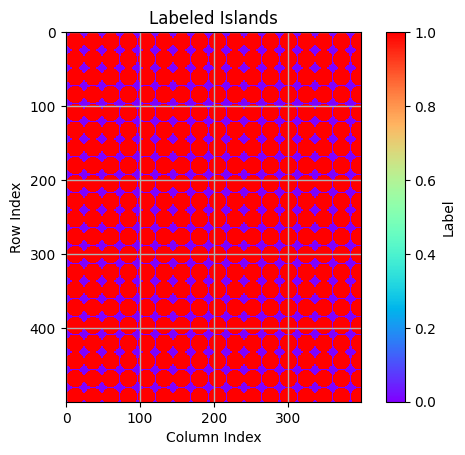

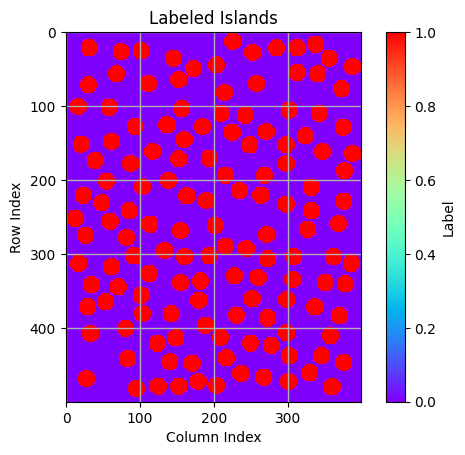

0.7933232257038456
0.8831531264564502


In [13]:

NX = 500
NY = 800
r = 12
bed_value = 0.5
lattice = ~ps.generators.lattice_spheres(r=r, shape=[NX, int((1-bed_value)*NY)])

teste, matrix, save = generate_lattice_spheres(r,NX,NY,bed_value, volume_fraction=0.3)
visualize_labeled_matrix(lattice)
visualize_labeled_matrix(save)
print(calculate_entropy(lattice))
print(calculate_entropy(save))




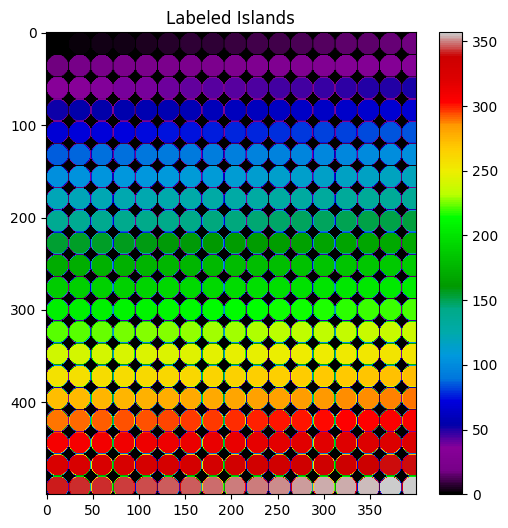

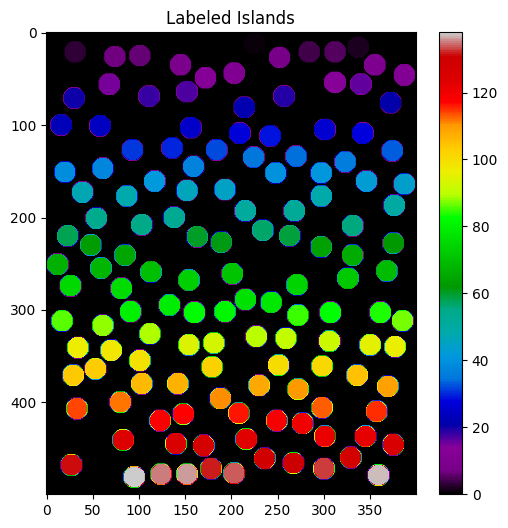

[(12.0, 12.0), (12.0, 36.0), (12.0, 60.0), (12.0, 84.0), (12.0, 108.0), (12.0, 132.0), (12.0, 156.0), (12.0, 180.0), (12.0, 204.0), (12.0, 228.0), (12.0, 252.0), (12.0, 276.0), (12.0, 300.0), (12.0, 324.0), (12.0, 348.0), (12.0, 372.0), (12.0, 392.8026755852843), (36.0, 12.0), (36.0, 36.0), (36.0, 60.0), (36.0, 84.0), (36.0, 108.0), (36.0, 132.0), (36.0, 156.0), (36.0, 180.0), (36.0, 204.0), (36.0, 228.0), (36.0, 252.0), (36.0, 276.0), (36.0, 300.0), (36.0, 324.0), (36.0, 348.0), (36.0, 372.0), (36.0, 392.8026755852843), (60.0, 12.0), (60.0, 36.0), (60.0, 60.0), (60.0, 84.0), (60.0, 108.0), (60.0, 132.0), (60.0, 156.0), (60.0, 180.0), (60.0, 204.0), (60.0, 228.0), (60.0, 252.0), (60.0, 276.0), (60.0, 300.0), (60.0, 324.0), (60.0, 348.0), (60.0, 372.0), (60.0, 392.8026755852843), (84.0, 12.0), (84.0, 36.0), (84.0, 60.0), (84.0, 84.0), (84.0, 108.0), (84.0, 132.0), (84.0, 156.0), (84.0, 180.0), (84.0, 204.0), (84.0, 228.0), (84.0, 252.0), (84.0, 276.0), (84.0, 300.0), (84.0, 324.0), (84.

In [21]:
from scipy.ndimage import label
import matplotlib.pyplot as plt
from skimage.measure import regionprops


from scipy.stats import gaussian_kde

def plot_and_process_matrix(matrix):
    # Convert the boolean matrix to an integer type for image processing
    image = matrix.astype(int)

    # Identify islands
    labeled_array, num_features = label(image)

    # Extract features of each island
    features = regionprops(labeled_array)

    centroid = [prop.centroid for prop in features]

    # Plot the labeled islands with matplotlib
    plt.figure(figsize=(6, 6))
    plt.imshow(labeled_array, cmap='nipy_spectral')
    plt.title("Labeled Islands")
    plt.colorbar()
    plt.show()

    return centroid

def calculate_centroid_entropy(centroids, matrix_shape):
    # Normalize centroid coordinates
    normalized_centroids = np.array(centroids) / np.array(matrix_shape)

    # Reshape centroids for KDE
    x, y = normalized_centroids.T

    # Use Gaussian KDE to estimate the probability density function
    kde = gaussian_kde([x, y])
    kde_values = kde([x, y])

    # Calculate entropy
    entropy = -np.sum(kde_values * np.log(kde_values))

    return entropy
# Calculate and plot
centroids = plot_and_process_matrix(lattice)
centroids_save = plot_and_process_matrix(save)
print(centroids)
print(calculate_centroid_entropy(centroids,lattice.shape))
print(calculate_centroid_entropy(centroids_save,save.shape))
# print(calculate_entropy(centroids))
# print(calculate_entropy(centroids_save))

In [19]:
np.save('teste.npy',save)

In [20]:
np.save('teste2.npy', lattice)

In [26]:
from scipy.spatial.distance import pdist
from skimage.measure import  regionprops
from scipy.ndimage import label
from scipy.stats import entropy
first_matrix = lattice
def calculate_entropy_from_centroids(matrix):
    # Convert the boolean matrix to an integer type for image processing
    image = matrix.astype(int)

    # Identify islands
    labeled_array, num_features = label(image)

    # Extract features of each island
    features = regionprops(labeled_array)

    # Extract centroids of each island
    centroids = np.array([prop.centroid for prop in features])

    # Calculate pairwise distances between centroids
    distances = pdist(centroids)

    # Calculate the probability distribution of the distances
    if len(distances) > 1:
        distance_probabilities = np.histogram(distances, bins='auto', density=True)[0]
        # Calculate the entropy of the distribution of distances
        distance_entropy = entropy(distance_probabilities, base=2)
    else:
        # If there's only one centroid, entropy is 0 as there's no variability in distances
        distance_entropy = 0

    return distance_entropy

# Calculate entropy based on centroids distances for the first matrix
entropy_centroids_first = calculate_entropy_from_centroids(first_matrix)

# Repeat the calculation for the second matrix
entropy_centroids_second = calculate_entropy_from_centroids(save)

entropy_centroids_first, entropy_centroids_second

(5.633486170270076, 4.7863096502931155)

In [31]:
def calculate_entropy_of_median_distances(matrix, grid_size=200):
    # Convert the boolean matrix to an integer type for image processing
    image = matrix.astype(int)

    # Identify islands
    labeled_array, num_features = label(image)

    # Extract features of each island
    features = regionprops(labeled_array)

    # Extract centroids of each island
    centroids = np.array([prop.centroid for prop in features])

    # Dimensions of each grid cell
    cell_height = matrix.shape[0] // grid_size
    cell_width = matrix.shape[1] // grid_size

    median_distances = []

    # Iterate over each grid cell
    for i in range(grid_size):
        for j in range(grid_size):
            # Determine the boundaries of the current cell
            start_row, end_row = i * cell_height, (i + 1) * cell_height
            start_col, end_col = j * cell_width, (j + 1) * cell_width

            # Filter centroids that fall within the current cell
            cell_centroids = centroids[(centroids[:, 0] >= start_row) & (centroids[:, 0] < end_row) &
                                       (centroids[:, 1] >= start_col) & (centroids[:, 1] < end_col)]

            # Calculate pairwise distances for centroids within the cell
            if len(cell_centroids) > 1:
                distances = pdist(cell_centroids)
                median_distance = np.mean(distances)
                median_distances.append(median_distance)

    # Calculate the entropy of the distribution of median distances
    if len(median_distances) > 1:
        distance_probabilities = np.histogram(median_distances, bins='auto', density=True)[0]
        distance_entropy = entropy(distance_probabilities, base=2)
    else:
        # If there's only one or no median distance, entropy is 0 as there's no variability
        distance_entropy = 0

    return distance_entropy

# Calculate entropy of median distances for the first matrix
entropy_median_distances_first = calculate_entropy_of_median_distances(first_matrix)
print(entropy_median_distances_first)

# Repeat the calculation for the second matrix
entropy_median_distances_second = calculate_entropy_of_median_distances(matrix)

entropy_median_distances_first, entropy_median_distances_second


0


(0, 0)